In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Replacing NaN (or null) Values

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.1 Mean/Median Imputation (numerical feature)

In [5]:
df['Age'].mean()

29.69911764705882

In [6]:
df['Age'].median()

28.0

In [7]:
df['Age'].fillna((df['Age'].mean()), inplace=True)
df['Age'].fillna((df['Age'].median()), inplace=True)

### 1.2 Most frequent Imputation (categorical feature)

In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df['Embarked'].value_counts().index[0]

'S'

In [10]:
value = df['Embarked'].value_counts().index[0]
df['Embarked'].fillna(value, inplace=True)

### 1.3 Replacing with 0 or -1

In [11]:
df['Age'].fillna(value=0, inplace=True)

In [12]:
df['Age'].fillna(value=-1, inplace=True)

### 1.3 Replacing with a Random Number or Random Sampling Imputation

In [13]:
df = pd.read_csv('titanic.csv') #Reload data

In [14]:
# Random number
null_rows = df['Age'].isnull()
num_null_rows = sum(null_rows)

rand = np.random.randint(1, 101, size=num_null_rows)
df.loc[null_rows, 'Age'] = rand

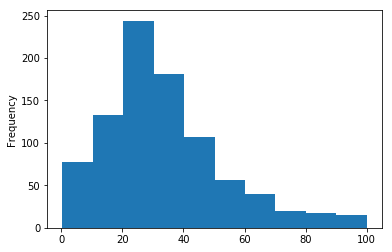

In [15]:
df['Age'].plot.hist()

In [16]:
df = pd.read_csv('titanic.csv') #Reload data

In [17]:
# Random Sampling
rand = np.random.choice(df.loc[~null_rows, 'Age'], replace=True, size=num_null_rows)
df.loc[null_rows, 'Age'] = rand

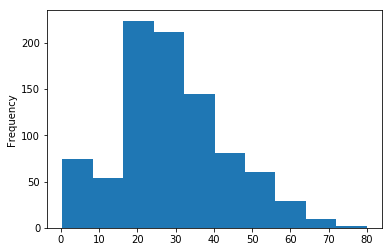

In [18]:
df['Age'].plot.hist()

### 1.4 Indicating Missingness

In [19]:
df = pd.read_csv('titanic.csv') #Reload data

In [20]:
df['Age_Missing'] = np.where(df['Age'].isnull(), 1, 0)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
df['Age_Missing'].value_counts()

0    714
1    177
Name: Age_Missing, dtype: int64

### 1.5 Imputation of NA by Values at the End of the Distribution

In [23]:
age_mean = df['Age'].mean()
age_std = df['Age'].std()

In [24]:
df['Age'].fillna(age_mean + age_std * 3, inplace=True)

### 1.6 Replacing With Values of Your Choosing Based on an Assumption

In [25]:
my_value = 55
df['Age'].fillna(my_value, inplace=True)

# 2. Feature Scaling

### 2.1 Standard Scaler

Standardization: scales features such that the distribution is centered around 0, with a standard deviation of 1

    (data - data.mean()) / data.std()

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaler.fit(df['Age'].values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
df['Age_scaled'] = scaler.transform(df['Age'].values.reshape(-1,1))

### 2.2 MinMax Scaler (or normalization)

Normalization: shrinks the range such that the range is now between 0 and 1

    (data – data.min()) / (data.max() – data.min())

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.transform(df['Age'].values.reshape(-1,1))

### 2.3 Robust Scaler

Robust Scaler: similar to normalization but it instead uses the interquartile range (Q1-Q3), so that it is robust to outliers.

    (data - data.median()) / IQR


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1100px-Boxplot_vs_PDF.svg.png" style="width: 400px;"/>

In [31]:
from sklearn.preprocessing import RobustScaler

In [32]:
scaler = RobustScaler()
scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.transform(df['Age'].values.reshape(-1,1))

# 3. Engineering Outliers in Numerical Variables

### 3.1 Mean/median imputation or random sampling

If we have reasons to believe that the outliers are due to mechanical error or problems during measurement.Because the number of outliers is in nature small (otherwise they would not be outliers), it is reasonable to use the mean/median imputation to replace them.

### 3.2 Identify Outliers with Quantiles

In [33]:
df = pd.read_csv('titanic.csv') #Reload data

In [34]:
q25 = df['Age'].quantile(0.25)
q75 = df['Age'].quantile(0.75)
IQR = q75 - q25
    
# Any value higher than ulimit or below llimit is an outlier
ulimit = q75 + 1.5*IQR
llimit = q25 - 1.5*IQR
ulimit, llimit

(64.8125, -6.6875)

In [35]:
oulier = np.bitwise_or(df['Age'] > ulimit, df['Age'] < llimit)
df['Age'][oulier]

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [36]:
df.loc[oulier, 'Age'] = np.mean(df['Age'])

### 3.3 Identify Outliers with Mean & Std.

In [37]:
df = pd.read_csv('titanic.csv') #Reload data

In [38]:
ulimit = np.mean(df['Age']) + 3 * np.std(df['Age'])
llimit = np.mean(df['Age']) - 3 * np.std(df['Age'])
ulimit, llimit

(73.24808109951077, -13.84984580539313)

In [39]:
oulier = np.bitwise_or(df['Age'] > ulimit, df['Age'] < llimit)
df['Age'][oulier]

630    80.0
851    74.0
Name: Age, dtype: float64

In [40]:
df.loc[oulier, 'Age'] = np.mean(df['Age'])

### 3.4 Discretization

In [41]:
df = pd.read_csv('titanic.csv') #Reload data

In [42]:
#Fil nan
df['Age'].fillna(-1, inplace=True)

In [43]:
# Get the bin edges using np.histogram
num_bins = 10
_, bin_edges = np.histogram(df['Age'], bins=num_bins)

In [44]:
bin_edges

array([-1. ,  7.1, 15.2, 23.3, 31.4, 39.5, 47.6, 55.7, 63.8, 71.9, 80. ])

In [45]:
labels = [i for i in range(num_bins)]

In [46]:
# Create new feature with pd.cut
df['Discrete_Age'] = pd.cut(df['Age'], bins=bin_edges, labels=labels, include_lowest=True)

In [47]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Discrete_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4
5,6,0,3,"Moran, Mr. James",male,-1.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,6
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


### 3.5 Winsorization (Top Coding Bottom Coding)

In [48]:
# Get the value of the 99th percentile
ulimit = np.percentile(df.Age.values, 99)

# Get the value of the 1st percentile (bottom 1%)
llimit = np.percentile(df.Age.values, 1)

In [49]:
# Create a copy of the age variable
df['Age_truncated'] = df.Age.copy()

In [50]:
# Replace all values above ulimit with value of ulimit
df.loc[df.Age > ulimit, 'Age_truncated'] = ulimit

In [51]:
# Replace all values below llimit with value of llimit
df.loc[df.Age < llimit, 'Age_truncated'] = llimit

# 4. Engineering Labels, Categorical Variables

### 4.1 One-Hot-Encoding or Dummy Variable 

In [52]:
df = pd.read_csv('titanic.csv') #Reload data

In [53]:
dummy = pd.get_dummies(df['Sex'], prefix='Sex')

In [54]:
dummy

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [55]:
df = pd.concat([df, dummy], axis=1)

In [56]:
df = df.drop('Sex', axis=1)

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


### 4.2 Mean Encoding

In [123]:
df = pd.read_csv('titanic.csv') #Reload data

In [124]:
# Calculate the mean encoding
means_pclass = df[['Survived']].groupby(df['Pclass']).apply(np.mean)
means_pclass.columns = ['MeanEncoding']
means_pclass

,MeanEncoding
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [125]:
# Merge the encoding into our dataframe (by matching Pclass to the index of our prob. ratio dataframe)
df = pd.merge(df, means_pclass, left_on=df.Pclass, right_index=True)

In [126]:
df.head()

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MeanEncoding
0,3,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.242363
2,3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.242363
4,3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.242363
5,3,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.242363
7,3,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.242363


### 4.3 Binary Encoding

In [62]:
df = pd.read_csv('titanic.csv') #Reload data

In [63]:
df['isElder'] = np.where(df['Age']>60, 1, 0)

In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isElder
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# 5. Engineering Dates

### 5.1 Creating Columns Based on Hour/Min…

In [65]:
df = pd.read_csv('news_sample.csv')

In [66]:
df.head()

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3,1,RTRS,"{'CRU', 'CN', 'RTRS', 'ENR', 'LEN', 'EMRG', 'N...","{'O', 'Z', 'OIL'}",...,0,0,0,0,0,0,0,3,6,7
1,2007-01-01 07:03:35+00:00,2007-01-01 07:03:34+00:00,2007-01-01 07:03:34+00:00,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'BD', 'INS', 'LATAM', 'CA', 'US', 'MX', 'IL',...","{'PGE', 'PCU', 'PCO', 'DNP', 'MD', 'E', 'G', '...",...,1,1,1,1,1,1,1,3,3,3
2,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,1cefd27a40fabdfe,PRESS DIGEST - Wall Street Journal - Jan 1,3,1,RTRS,"{'IQ', 'RO', 'US', 'ID', 'RET', 'RTRS', 'ENR',...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,5,11,17
3,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,5,13,15
4,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,0,0,0,0,0


In [67]:
time = pd.to_datetime(df['time'])

In [68]:
df['Month'] = time.dt.month
df['Day'] = time.dt.day
df['Hour'] = time.dt.hour
df['Minute'] = time.dt.minute
df['Seconds'] = time.dt.second

In [69]:
df.head()

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,...,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D,Month,Day,Hour,Minute,Seconds
0,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3,1,RTRS,"{'CRU', 'CN', 'RTRS', 'ENR', 'LEN', 'EMRG', 'N...","{'O', 'Z', 'OIL'}",...,0,0,3,6,7,1,1,4,29,32
1,2007-01-01 07:03:35+00:00,2007-01-01 07:03:34+00:00,2007-01-01 07:03:34+00:00,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'BD', 'INS', 'LATAM', 'CA', 'US', 'MX', 'IL',...","{'PGE', 'PCU', 'PCO', 'DNP', 'MD', 'E', 'G', '...",...,1,1,3,3,3,1,1,7,3,35
2,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,1cefd27a40fabdfe,PRESS DIGEST - Wall Street Journal - Jan 1,3,1,RTRS,"{'IQ', 'RO', 'US', 'ID', 'RET', 'RTRS', 'ENR',...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,5,11,17,1,1,11,29,56
3,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,5,13,15,1,1,12,8,37
4,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'PUB', 'BUS', 'INS', 'CA', 'ENT', 'US', 'FIN'...","{'M', 'PMF', 'DNP', 'PTD', 'T', 'E', 'D', 'PSC...",...,0,0,0,0,0,1,1,12,8,37


### 5.2 Creating an isweekend Column

In [70]:
# Create is weekened column
df['is_weekend'] = np.where(df['Day'].isin([5,6]), 1, 0)

# 6. Engineering Mixed Variables

Mixed variables are those which values contain both numbers and text strings

In [71]:
df = pd.read_csv('titanic.csv')

In [72]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [73]:
df['Cabin'].fillna('-0', inplace=True)

### 6.1 Extracting the categorical part in one variable and the numerical part in a different variable

In [74]:
df['Cabin-string'] = df['Cabin'].apply(lambda x : x[0])
df['Cabin-number'] = df['Cabin'].apply(lambda x : x[1:])

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin-string,Cabin-number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-0,S,-,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-0,S,-,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-0,S,-,0


# 7. Engineering Rare Values in Categorical Variables

### 7.1 Replacing the Rare Value by Most Frequent Value

In [99]:
df = pd.read_csv('titanic.csv')

In [100]:
val_counts = df['Age'].value_counts()
val_counts

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [101]:
uncommon_ages = val_counts[val_counts<5].index.values
uncommon_ages

array([11.  , 62.  , 60.  ,  8.  , 56.  ,  5.  , 46.  , 65.  ,  7.  ,
        6.  , 61.  , 55.  , 28.5 , 71.  , 59.  , 63.  ,  0.83, 30.5 ,
       70.  , 57.  ,  0.75, 13.  , 10.  , 64.  , 40.5 , 32.5 , 45.5 ,
       20.5 , 24.5 ,  0.67, 14.5 ,  0.92, 74.  , 34.5 , 80.  , 12.  ,
       36.5 , 53.  , 55.5 , 70.5 , 66.  , 23.5 ,  0.42])

In [102]:
most_freq_age = val_counts.index[0]
df.loc[df['Age'].isin(uncommon_ages), 'Age'] = most_freq_age

In [103]:
df['Age'].value_counts()

24.0    117
22.0     27
18.0     26
19.0     25
30.0     25
28.0     25
21.0     24
25.0     23
36.0     22
29.0     20
26.0     18
35.0     18
32.0     18
27.0     18
16.0     17
31.0     17
33.0     15
34.0     15
23.0     15
20.0     15
39.0     14
17.0     13
42.0     13
40.0     13
45.0     12
38.0     11
4.0      10
2.0      10
50.0     10
48.0      9
47.0      9
44.0      9
9.0       8
54.0      8
51.0      7
1.0       7
49.0      6
37.0      6
14.0      6
41.0      6
52.0      6
3.0       6
15.0      5
43.0      5
58.0      5
Name: Age, dtype: int64

### 7.2 Grouping the Observations that Show Rare Value Into a Unique Category

In [104]:
df['Age_is_Rare'] = 0

In [105]:
df.loc[df['Age'].isin(uncommon_ages), 'Age_is_Rare'] = 1

# 8. Transforming Variables

Particularly for linear models, it can be useful to transform input features (or the target) prior to fitting the model, such that their distribution appears normal, or approximately normal (i.e. symmetric and bell-shaped).

### 8.1 Gaussian Transformation

In [83]:
df['Age Log'] = df['Age'].apply(np.log)

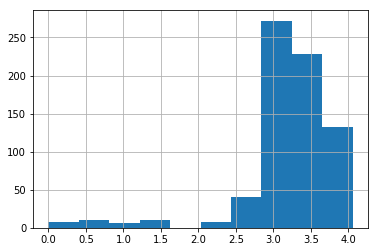

In [84]:
df['Age Log'].hist()

### 8.2 Inverse Transformation

In [85]:
df['Age Inverse'] = 1.0 / df['Age']

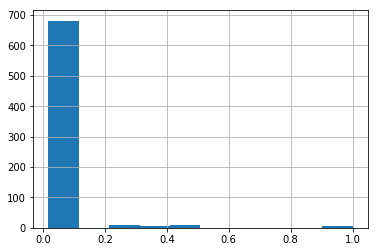

In [86]:
df['Age Inverse'].hist()

### 8.3 Square Root Transformation

In [87]:
df['Age Sqrt'] = np.sqrt(df['Age'])

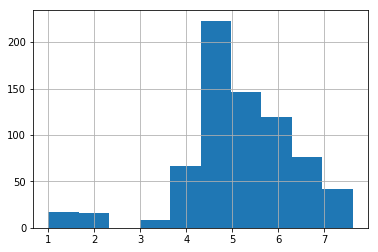

In [88]:
df['Age Sqrt'].hist()

### 8.4 Exponential Transformation

In [89]:
df['Age Exp'] = np.exp(df['Age'])

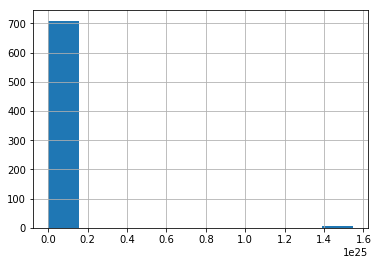

In [90]:
df['Age Exp'].hist()

### 8.5 Box-Cox Transformation

In [91]:
from scipy.stats import boxcox
df['Age BoxCox'] = boxcox(df['Age'])[0]

C:\Users\Pisut\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1038: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


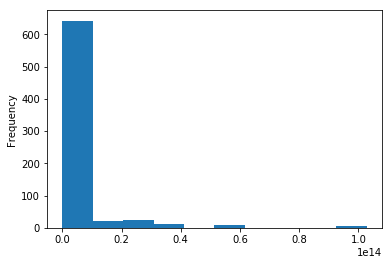

In [92]:
df['Age BoxCox'].plot.hist()

# 9. Interaction Features

In [93]:
df = pd.read_csv('titanic.csv')

### 9.1 Addition

In [94]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 9.2 Multiplication 

In [96]:
df['Age_x_Fare'] = df['Age'] * df['Fare']

In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_x_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,159.5000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2708.7654
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,206.0500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1858.5000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,281.7500
